In [1]:
def search(keyword, option1= None, option2 = None ):    
    import os
    import re 
    import sys
    import pandas as pd
    import urllib.request
    # 네이버 API 접근 계정
    client_id = "I4Fva_A2tRCvTccEOaAX"
    client_secret = "jC5ic5g9wu"

    # URL
    url = "https://openapi.naver.com/v1/datalab/search";

    # 질의문
    body = "{\"startDate\":\"2020-01-01\",\
             \"endDate\":\"2020-04-30\",\
             \"timeUnit\":\"date\",\
             \"keywordGroups\":[{\
             \"groupName\":\"%s\",\
             \"keywords\":[\"%s\",\"%s\"]}],\
             \"device\":\"pc\",\
             \"ages\":[\"1\",\"2\"],\
             \"gender\":\"f\"}" %(keyword,option1,option2);

    # 초기화
    regexp_date = ''  # 날짜 정규식 적용
    regexp_ratio= ''  # 비율 정규식 적용
    union_date=""     # 날짜 정규식 결과값 결합
    result_date = []  # String -> List 변환
    result_ratio = [] # String -> List 변환
    union_date_ratio =[] # 날짜와 비율을 같은 인덱스에 담기 위한 리스트

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()

    if(rescode==200):

        # 네이버API 질의문에 대한 응답 리스트에 저장 (인코딩, 쉼표 기준 문자열 자르기)
        response_body = response.read().decode('utf-8').split(',')

        for i in range(0,len(response_body)) :
            #정규식(날짜) 적용하여 필터링된 값 저장
            regexp_date = re.findall('\d{4}-\d\d-\d\d',response_body[i])
            regexp_date = str(regexp_date).replace("['",'')
            regexp_date = regexp_date.replace("']",'')

            if regexp_date != '[]':
                result_date.append(str(regexp_date)) 

        # result_date에서 시작&끝 날짜 제외
        result_date = result_date[2:]



        for i in range(0,len(response_body)) :
            #정규식(비율->실수) 적용하여 필터링된 값 저장
            #100이 나오는 경우가 있어 정규식에 포함
            rate = re.compile(':\d{1,3}')
            regexp_ratio = re.findall('\d+\.\d+',response_body[i])
            if regexp_ratio == list(''):
                regexp_ratio = re.findall(rate,response_body[i])
            if regexp_ratio!=list(''):
                #리스트가 비어있지 않을 경우에만 저장
                regexp_ratio = str(regexp_ratio).replace("['",'')
                regexp_ratio = str(regexp_ratio).replace("']",'')
                regexp_ratio = str(regexp_ratio).replace(":",'')
                result_ratio.append(regexp_ratio)


    else:
        print("Error Code:" + rescode)

   

    # 엑셀파일 저장
    df = pd.DataFrame(union_date_ratio, columns=['날짜','비율'])
    print(len(result_ratio)==len(result_date))
    for i in range(0,len(result_date)):

        df = df.append(
        {
            '날짜': result_date[i],
            '비율': result_ratio[i]

        }, ignore_index=True 
        )

  
    df.to_excel(keyword+'.xlsx', index=False)


    print('*** 내보내기 완료 ***')



Text(0.5, 1.0, '네이버 검색율 변동 추이')

<Figure size 432x288 with 0 Axes>

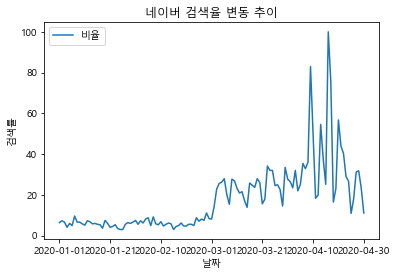

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
 

### 한국어 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
fig = plt.figure()


df = pd.read_excel('네이버API 테스트.xlsx',index_col = '날짜')
df = df[0:122]


ax = df.plot()
ax.set_ylabel('검색률')
ax.set_title('네이버 검색율 변동 추이')

,비율
날짜,
2020-01-01,0.10370
2020-01-02,0.05185
2020-01-03,0.12963
2020-01-04,0.49909
2020-01-05,0.01296
...,...
2020-04-26,5.61317
2020-04-27,5.03629
2020-04-28,2.45009


<Figure size 432x288 with 0 Axes>

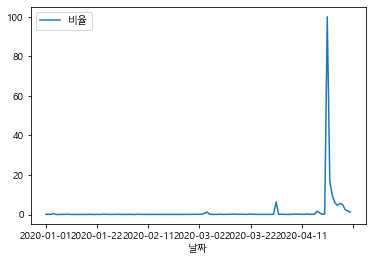

In [12]:
from naver_api import search
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
### 한국어 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
fig = plt.figure()

df = search('김정은')

df.plot()
df